본 강좌에서는 다중분류(Multiclass Classification)을 다층 퍼셉트론으로 해보겠습니다. 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 데이터셋 준비하기

In this tutorial we will use the standard machine learning problem called the iris flowers dataset. This dataset is well studied and is a good problem for practicing on neural networks because all of the 4 input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower measurements and the output variable is specific iris species. The attributes for this dataset can be summarized as follows:
1. Sepal length in centimeters. 
2. Sepal width in centimeters. 
3. Petal length in centimeters. 
4. Petal width in centimeters. 
5. Class.

This is a multiclass classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species. This is an important type of problem on which to practice with neural networks because the three class values require specialized handling. Below is a sample of the first five of the 150 instances:

    5.1,3.5,1.4,0.2,Iris-setosa
    4.9,3.0,1.4,0.2,Iris-setosa
    4.7,3.2,1.3,0.2,Iris-setosa
    4.6,3.1,1.5,0.2,Iris-setosa
    5.0,3.6,1.4,0.2,Iris-setosa

[다운](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
# Binary Classification with Sonar Dataset: Standardized

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using Theano backend.


In [3]:
# load dataset
dataframe = pandas.read_csv("warehouse/iris.data", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

    Iris-setosa
    Iris-versicolor
    Iris-virginica

    Iris-setosa, Iris-versicolor, Iris-virginica 
    1, 0, 0
    0, 1, 0
    0, 0, 1

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

---

### 모델 구성하기

Dense 클래스를 사용하여 완전 연결 레이어(Fully Connected Layer)를 정의할 수 있다.

- 첫번째 인자 : 뉴런의 수
- 두번째 인자 : 네트워크 가중치(network weight) 초기화 방법
 - uniform : 균등분포 (uniform distribution)의 작은 난수들로 초기화 (0~0.05 사이)
 - normal : 가우시안 분포 (Gaussian distribution)로 생성된 작은 난수들로 초기화 
- 세번째 인자 : 활성화 함수(activation function) 지정
 - relu : rectifier 활성화 함수
 - sigmoid : sigmoid 활성화 함수
 - tanh : tanh 활성화 함수
 
마지막 레이어는 sigmoid 할성화 함수를 사용하는데, 이유는 결과가 0과 1사이로 나오는 것을 보장하며, 양성 클래스의 확률로 쉽게 매핑할 수 있기 때문이다. 또한 0.5 임계치(threshold)을 같은 클래스의 범주형 분류(hard classification)를 할 수 있다.

- 첫번째 은닉층(hidden layer)는 12개 뉴런을 가지고, 8개 입력을 받아들인다.
- 두번째 은닉층은 8개 뉴런을 가진다.
- 마지막 레이어는 클래스를 예측하는 1개의 뉴런을 가진다.

In [5]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=4, init= 'normal' , activation= 'relu' ))
model.add(Dense(3, init= 'normal' , activation= 'sigmoid' ))

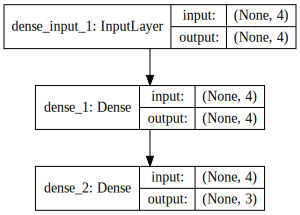

In [6]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-1.svg)

---

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [7]:
# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

---

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [10]:
# Fit the model
model.fit(X, dummy_y, nb_epoch=200, batch_size=5) # nb_epoch 200

Epoch 1/200
150/150 [==============================] - 0s - loss: 1.0983 - acc: 0.2733     
Epoch 2/200
150/150 [==============================] - 0s - loss: 1.0945 - acc: 0.2133     
Epoch 3/200
150/150 [==============================] - 0s - loss: 1.0880 - acc: 0.3133     
Epoch 4/200
150/150 [==============================] - 0s - loss: 1.0792 - acc: 0.3333     
Epoch 5/200
150/150 [==============================] - 0s - loss: 1.0652 - acc: 0.3333     
Epoch 6/200
150/150 [==============================] - 0s - loss: 1.0496 - acc: 0.3333     
Epoch 7/200
150/150 [==============================] - 0s - loss: 1.0315 - acc: 0.3333     
Epoch 8/200
150/150 [==============================] - 0s - loss: 1.0115 - acc: 0.3333     
Epoch 9/200
150/150 [==============================] - 0s - loss: 0.9903 - acc: 0.3333     
Epoch 10/200
150/150 [==============================] - 0s - loss: 0.9676 - acc: 0.3600     
Epoch 11/200
150/150 [==============================] - 0s - loss: 0.9435 - acc

---

### 모델 사용하기

In [15]:
# evaliuate
scores = model.evaluate(X, dummy_y)

print("")
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 32/208 [===>..........................] - ETA: 0s
acc: 94.23%


---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/2017/01/27/Keras_Lecture_Plan/)
* 이전 : [딥러닝 이야기/레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/Layer_Talk/)
* 다음 : [딥러닝 기본 실습/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/Keras/2017/02/04/CNN_Getting_Started/)